Multiple Linear Regression and Regression Error Metrics

##### import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

In [16]:
import missingno as msno

In [20]:
!pip install summarytools

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for summarytools: filename=summarytools-0.2.3-py3-none-any.whl size=8573 sha256=c817dc70436fd228c16bf7b5c26f15ad6efaa13e97566a0e67a67eb239d472cc
  Stored in directory: /Users/mahmooooodie/Library/Caches/pip/wheels/ba/b9/0e/dca846354555f16ac3dd84d4b305072a30f33d6d4243c38bfa
Successfully built summarytools


In [22]:
from summarytools import dfSummary

## Start

In [2]:
# y = b0 +b1X1 +b2X2 +b3X3

### Read Dataset

In [3]:
df = pd.read_csv('/Users/mahmooooodie/Desktop/Machine Learning/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Data Preparation and EDA

In [9]:
df.shape

(200, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
df.isnull()

,TV,radio,newspaper,sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [14]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

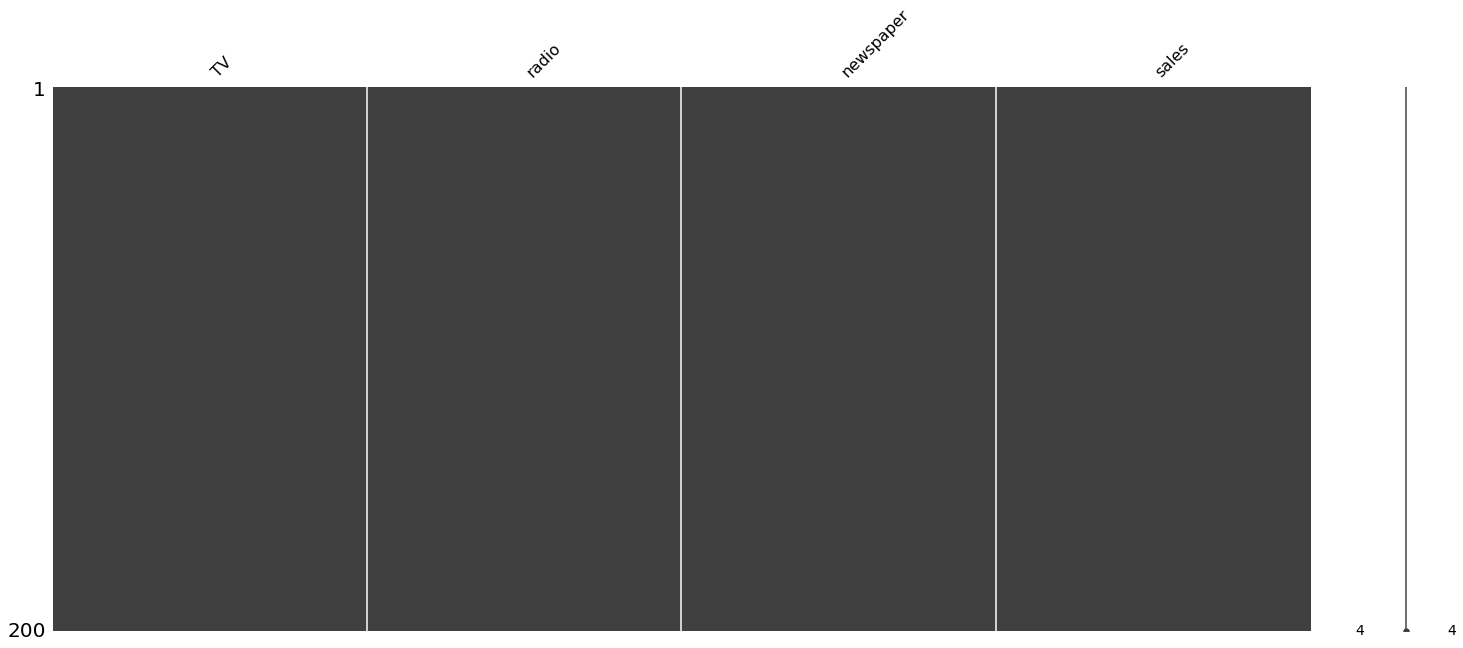

In [17]:
msno.matrix(df);

In [18]:
df.sort_values(by = 'sales', ascending = False)

,TV,radio,newspaper,sales
175,276.9,48.9,41.8,27.0
183,287.6,43.0,71.8,26.2
198,283.6,42.0,66.2,25.5
98,289.7,42.3,51.2,25.4
147,243.2,49.0,44.3,25.4
...,...,...,...,...
108,13.1,0.4,25.6,5.3
78,5.4,29.9,9.4,5.3
8,8.6,2.1,1.0,4.8
155,4.1,11.6,5.7,3.2


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [23]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,TV[float64],Mean (sd) : 147.0 (85.9)min < med < max:0.7 < 149.8 < 296.4IQR (CV) : 144.4 (1.7),190 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAAsTAAALEwEAmpwYAAABRUlEQVR4nO3ZPw6CMBiH4WpMWOoKgxsX0At4CE/A6rU4gadykJmFhAQHZ5QK9A+/91k1pOmbfKW6G4bBYPv2oRcAPw5jH+R5frPWFlMe0rbtq2max3LLSpPLnhnjd99GQ1tri6qqnlMeUtf1abklpctlz4zxu2+MbhGEFkFoEYQWQWgRo2/d+HC5MvV9fzbGTH7r9onQPzheM69rr+df3kPzQ0wY3kPzQ0wYjO6Auq67lGV5n/LdudON0AFlWXb0Nd02E5qz/7vNhObs/y7q0C5nWMx32BhEHdrxDIv2DhuDqEOvRXFSSIZOcVLMvYpJhk7R3KvYIqEVR2FqFgmd4ihUw//RIggtgtAiCC2C0CIILYLQIggtgtAiCC2C0CIILYLQIggtgtAiCC2C0CIILYLQIggtgtAiCC2C0CIILYLQIggt4g22voC7Lp7C+QAAAABJRU5ErkJggg=="">",0(0.0%)
2,radio[float64],Mean (sd) : 23.3 (14.8)min < med < max:0.0 < 22.9 < 49.6IQR (CV) : 26.5 (1.6),167 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAAsTAAALEwEAmpwYAAABWElEQVR4nO3YMU7DMBSH8QeqlMWs6cCCcgG4QA/BCbxyLZ+AU3APFgYye4kUKYwMENVWX0Pw//utjdI0n+K8+mZZFkP7bv/6ArCNw9oHfd8/hxCOJSfJOX+O4/jqd1nwtho6hHCMMX6UnCSldO93SbgGlm4RhBZBaBGEFkFoEYQWQWgRhBZBaBGrO2MtU9zelQytuL3L0i1i8ye65WWz5reZmeWcH0II74XHXnQvNg/d8rJZ89vMzFJKpxjjW+GxF90Ll9DTND0Nw/BScuw8z49mVnwz4MMldNd1dxVP6cnjO1GHYUxEM3+vagYhxddHM6Erhzy518euQzPk+dl1aIY8PwxjInb9RONbzWvst100Qv8Tla+xH7tohD6jlYGQ0Ge0MhAyjIkgtAhCiyC0CEKLILQIQosgtAhCiyC0CEKLILQIQosgtAhCiyC0CEKLILQIQosgtIgvvjd5fiWE34YAAAAASUVORK5CYII="">",0(0.0%)
3,newspaper[float64],Mean (sd) : 30.6 (21.8)min < med < max:0.3 < 25.8 < 114.0IQR (CV) : 32.4 (1.4),172 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAAsTAAALEwEAmpwYAAABP0lEQVR4nO3cMU6EQBhA4dGY0IwtW9iYOYH3sPIEtJ6JjhPslbaxkJqGCg9gWGeSEQjvfe1uCMnb/PxDsQ/LsgSd3+PeN6BtPK190LbtR4zxknORaZq+x3G81rst1bYaOsZ46bruK+ciwzC81Lsl/QdHN4ShIQwNYWiI1WWsxDzPbymlz5zvuqHvo0ropmme3dCPzdENYWgIQ0MYGqLKMlbCDX0fm4d2Q9+HoxvC0BCGhtj8GV3Cxa2eQ4d2cavH0Q1haAhDQxgawtAQhoYwNIShIQ79wqSEb9HuO01o36Ld5+iGMDSEoSEMDWFoCENDnOZ4VYJ45kaGJp65Hd0QhoZAju4SZ3meG/oPZ3meO7ohDA1haAhDQxgawq27opKjWAjbHscMXVHJUSyEEPq+f08p5f5V9muM8Zb53V8/oB+86YYxaLXfKgAAAABJRU5ErkJggg=="">",0(0.0%)
4,sales[float64],Mean (sd) : 14.0 (5.2)min < med < max:1.6 < 12.9 < 27.0IQR (CV) : 7.0 (2.7),121 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAAsTAAALEwEAmpwYAAABR0lEQVR4nO3bsW2EMBhAYSeKROO0XJGOBZIFMkQmoL21mCBTpQg1DRISmYAL1nEG/N5XU1j3dOa3JZ7meQ4q3/PeC1AeL3sv4Ja6rr9ijJc1zw7D8Nv3/fej13RWhw4dY7y0bfuz5tmu694evZ4zc+uGMDSEoSEMDWFoCENDGBrC0BCGhjA0xKGvQFOM4/jRNM11zbPEe/FiQldV9eq9+DK3bghDQxgawtAQxQxjKYgTOjI0cUJ364YwNIShIQwNYWgIQ0Mgj1cpSjlzG/ofpZy5s4dO+Z5qmqb3EMKqH1m3ZQ+d+D3V56PXQ+EwBuE7ekMpg1sIeYc3Q28oZXALIe/w5tYNYWgIQ0P4jt5Rzls3Q+8o562bWzfEJv9orzWPb5PQXmsen+/ok7h3cDP0Sdw7uDmMQRgawtAQi+9oj0xlWQztkaksfxqVhss5kgwOAAAAAElFTkSuQmCC"">",0(0.0%)


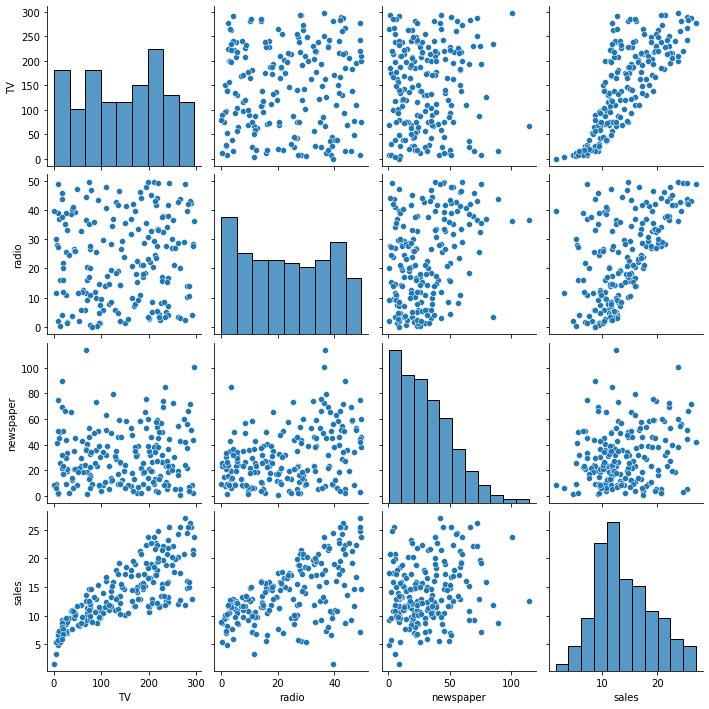

In [24]:
sns.pairplot(df);

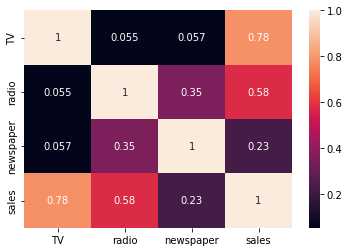

In [26]:
sns.heatmap(df.corr(), annot = True);

In [27]:
from scipy.stats import skew

In [28]:
 for i in df.drop(columns = 'sales'):
        print(i, skew(df[i]))
    

TV -0.06932836662244649
radio 0.0934668451108453
newspaper 0.8879959753085498


In [127]:
  ## the distribution can be considered symmetric if skewness is between -1 and 1

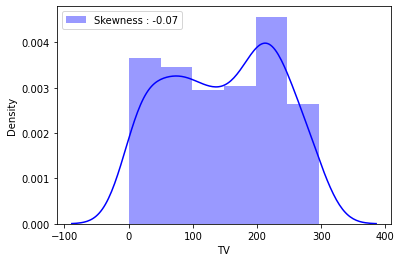

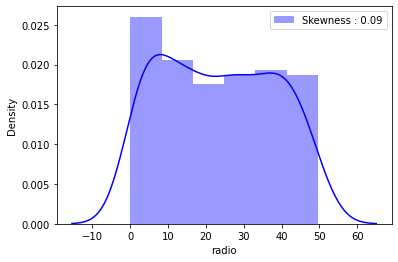

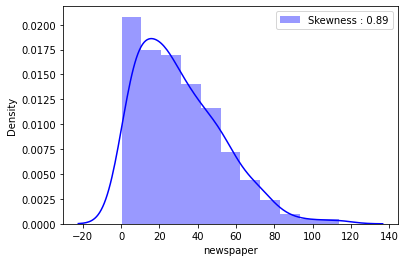

In [30]:
for j in df.drop(columns = "sales").columns:    
    g = sns.distplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()))   
    g = g.legend(loc= "best")  
    plt.show()

In [43]:
# checking correlation
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


## Train - Test- Split

- rows < 1000, use 70% 30% / 80% 20% split
- rows < 1M, use 80% 20% / 90% 10% split
- rows > 1M, use 95% 5% split

In [44]:
 # X : feature, y : target
    
X = df.drop(columns = 'sales')
y = df['sales']

In [45]:
print(X,y)

        TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns] 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [46]:
# necessary package for randomly splitting the train split data
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [53]:
# shape of train test splits
print('X train feature shape: {}\n
y train feature shape: {}\n
X test feature shape: {}\n
y test feature shape: {}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X train feature shape: (140, 3)
y train feature shape: (140,)
X test feature shape: (60, 3)
y test feature shape: (60,)


## Model Fitting and Comparing Actual with Predicted Labels

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
# first define model so we do not run into any errors
model = LinearRegression()

In [56]:
model.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = model.predict(X_test)
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [59]:
model.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [60]:
# labels of coefficients above for the model

model.feature_names_in_

array(['TV', 'radio', 'newspaper'], dtype=object)

In [65]:
model.intercept_

2.7089490925159048

In [75]:
# prediction for any row's variables

# sum function to get each row [Tv,radio, newspaper] multiplied by its coefficient and added intercept for regression

sum(X_test.loc[95] * model.coef_) + model.intercept_

16.565396297434837

In [67]:
 y_test.loc[95]

16.9

In [77]:
my_dict = {"actual": y_test, "pred": y_pred, "residual": y_test - y_pred}

In [79]:
comparison = pd.DataFrame(my_dict)
comparison

,actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


In [80]:
# taking 25 random results and visualizing their residuals
results_sample = comparison.sample(25)
results_sample

,actual,pred,residual
79,11.0,9.513324,1.486676
197,12.8,12.404863,0.395137
66,9.5,9.014430,0.485570
182,8.7,6.525428,2.174572
67,13.4,11.806277,1.593723
124,19.7,19.768218,-0.068218
76,6.9,4.381906,2.518094
15,22.4,21.188228,1.211772
173,11.7,11.631569,0.068431
122,11.6,13.163884,-1.563884


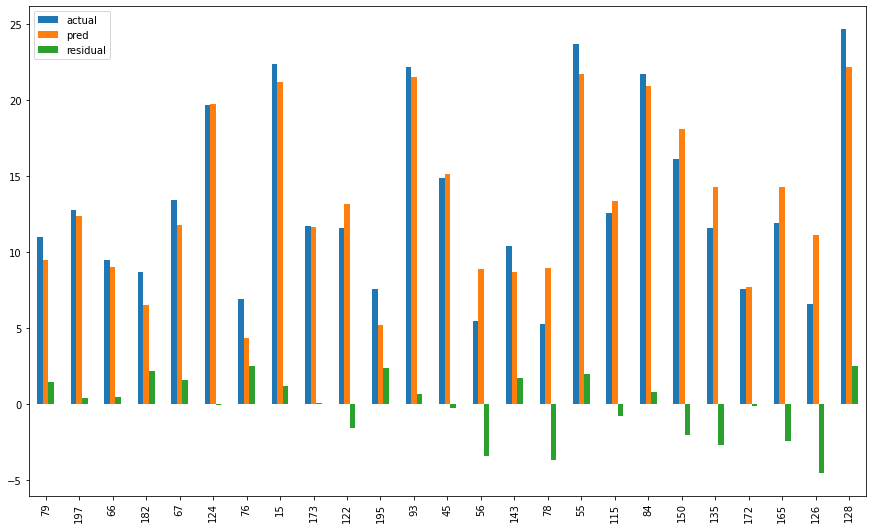

In [81]:
results_sample.plot(kind = 'bar', figsize = (15,9));

## Error Metrics

In [82]:
# importing performance testing metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# RMSE will be calculated manually

In [84]:
R2_score = r2_score(y_test,y_pred)
R2_score

0.8609466508230369

In [86]:
# MAE calculation
# We prefer close to 0 value
mae = mean_absolute_error(y_test,y_pred)
mae

1.5116692224549086

In [87]:
# MSE calculation
# we prefer close to 0 value
mse = mean_squared_error(y_test,y_pred)
mse

3.796797236715217

In [88]:
# RMSE calculation
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

1.9485372043446378

In [89]:
# mean error ratio
sales_mean = df['sales'].mean()
sales_mean

14.022500000000003

In [90]:
mae / sales_mean

# Shows us that our mae is not too significant based on our test

0.10780311802138766

In [92]:
# same with mse to sales mean ratio, the closer to 0 it is the better after comparing
# with other potential models

mse / sales_mean

0.2707646451570844

In [94]:
# rmse is more sensitive to heavier errors making it more reliable

rmse / sales_mean

0.1389579036794179

## Adjusted R^2 Score

Adjusted R^2 = 1-[(1-R^2)* (n-1)/(n-p-1)]

In [95]:
def adj_r2(y_test,y_pred, df):
    r2 = r2_score(y_test,y_pred)  #r2 score
    n = df.shape[0]             #number of observations
    p = df.shape[1]-1          # number of ind. variables / features
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1) # adj r2 formula
    return adj_r2
    

In [96]:
adj_r2(y_test,y_pred,df)

0.8588182832335935

3

## Evaluation Model

In [110]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print('Model Testing Performance:')
    print('-------------------------------------')
    print(f'R2 score \t: {R2_score}')
    print(f'MAE \t\t: {mae}')
    print(f'MSE \t\t: {mse}')
    print(f'RMSE \t\t: {rmse}')

In [111]:
eval_metric(y_test,y_pred)

Model Testing Performance:
-------------------------------------
R2 score 	: 0.8609466508230369
MAE 		: 1.5116692224549086
MSE 		: 3.796797236715217
RMSE 		: 1.9485372043446378


In [112]:
# Testing for overfitting using r2 of train and comparing with r2 of test

In [114]:
# X train prediction

y_train_pred = model.predict(X_train)
y_train_pred

array([17.39149783, 15.19196153, 11.41650701, 11.20610472, 16.39256165,
        6.90577778, 21.17740606,  6.10528574,  9.66662607, 11.67308587,
        9.0704377 ,  6.30582199, 14.7930121 , 17.42999512, 16.14599956,
       16.12273906, 14.9308629 , 19.61593142, 13.70741553, 21.09067507,
       13.09101877, 13.79551693,  8.87971636, 16.97348947,  8.22902448,
       15.34026923, 13.95862675, 23.23157581, 12.67992504, 23.10768546,
        6.80057243, 18.81832259, 23.69669553, 18.39890879, 16.97890645,
       16.44055305, 12.41657918, 11.94072527, 16.7732918 , 14.5933997 ,
       13.22910727,  7.49691601, 19.30121038,  9.33105452, 19.3603766 ,
       10.16463427,  6.94369039, 16.52918217, 13.53571009, 14.80225851,
       11.13948107, 20.85632272, 24.02985438, 18.427486  , 17.84570024,
       15.11333638, 17.21352856,  9.2345359 , 17.29735156, 19.22919752,
       16.29255016,  3.54203145,  5.24055709, 15.86268553, 15.12384811,
       16.31596188, 18.34249185, 23.4941462 , 14.34540589, 20.48

In [115]:
eval_metric(y_train,y_train_pred)

Model Testing Performance:
-------------------------------------
R2 score 	: 0.9055159502227753
MAE 		: 1.1581502948072528
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


## Plotting Residuals

In [116]:
residuals = y_test - y_pred

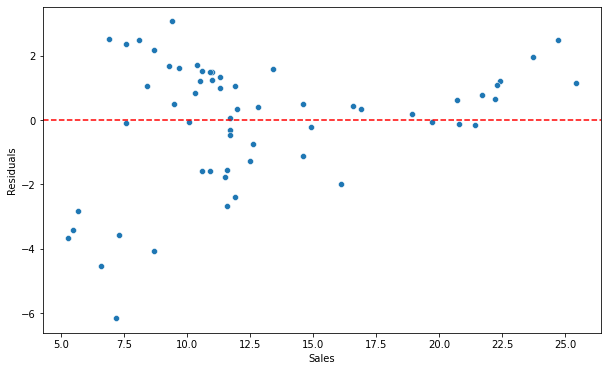

In [118]:
# we're looking for a no correlation view

plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals)
plt.xlabel('Sales')
plt.ylabel('Residuals')
plt.axhline(y = 0, color = 'r', linestyle = '--');

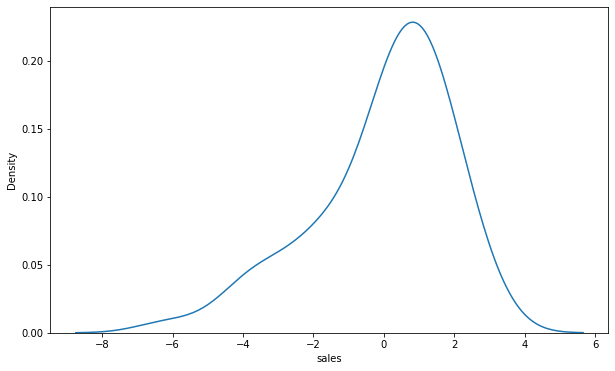

In [122]:
plt.figure(figsize = (10,6))
sns.kdeplot(residuals);


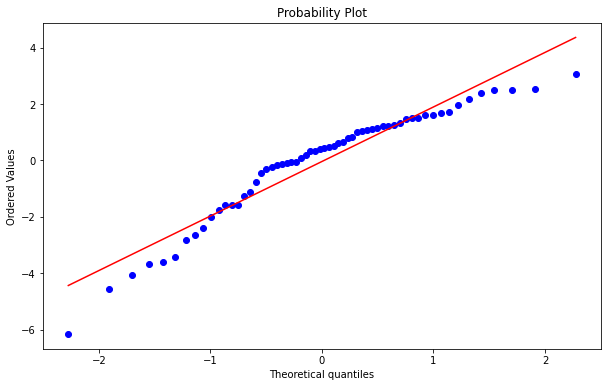

In [125]:
# Plotting the Q-Q graph
# checking if residuals are normally distributed

plt.figure(figsize = (10,6))
stats.probplot(residuals, dist = 'norm', plot = plt);

In [128]:
# we can consider normal since between -1 and 1
skew(residuals)

-0.9865673346742714

In [130]:
!pip install yellowbrick

     |████████████████████████████████| 282 kB 922 kB/s eta 0:00:01


In [131]:
from yellowbrick.regressor import ResidualsPlot

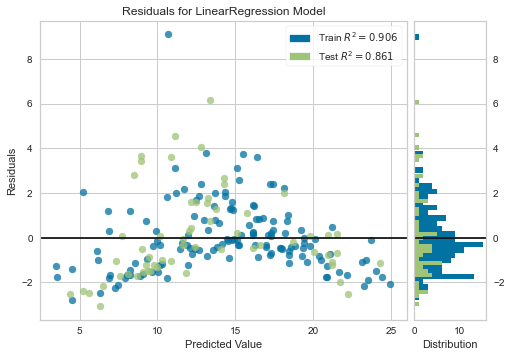

In [132]:
model = LinearRegression()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [133]:
# prediction error for linear regression
from yellowbrick.regressor import PredictionError

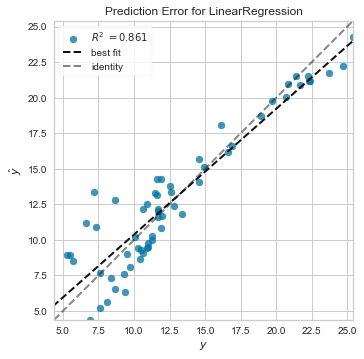

In [139]:

model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

## Retraining Model on Full Data - Final Model

In [141]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

### Coefficients

In [142]:
# retreiving coefficients

final_model.coef_


array([ 0.04576465,  0.18853002, -0.00103749])

In [144]:
# converting coefficients to datafram
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


## Prediction on New Data using Final Model

In [147]:
# Example feature values
# TV : 150, Radio : 20, newspaper : 15
adv = [[150,20,15]]

final_model.predict(adv)

array([13.55862413])

In [149]:
sum(final_model.coef_*[150,20,15]) +final_model.intercept_

13.558624130495994

In [150]:
adv_2 = [[150,20,15],[160,15,20]]
final_model.predict(adv_2)

array([13.55862413, 13.06843304])

In [151]:
final_model.predict(adv_2)[1] - final_model.predict(adv_2)[0]

-0.4901910952494273